In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm


In [3]:
data = pd.read_excel('Project1_DataSet.xlsx')

# Project 1

## Part 1 -- create a time series plot of the data (5 pts)

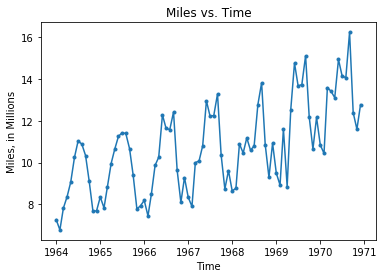

In [4]:
plt.plot(data['Month'],data['Miles, in Millions'], '.-')
plt.xlabel('Time')
plt.ylabel('Miles, in Millions')
plt.title('Miles vs. Time')
plt.show()

## Part 2 -- compute the ACF and display it in a plot. What is the seasonal period? (5 pts)

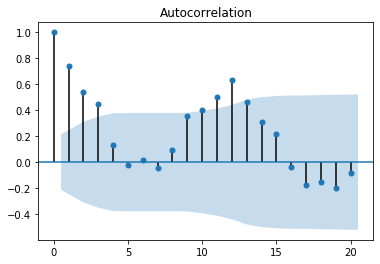

In [5]:
plot_acf(data['Miles, in Millions'],lags=20)
plt.show()

The seasonal period is 12 months.

## Part 3 -- Compute a moving average for the data and overlay on the original time-series plot. What is a suitable choice for the moving average window length? Why? (5 pts)

In [6]:
def moving_avg(span, data):
    averages = []
    for i in range(span, len(data)+1):
        averages+=[sum(data[i-span:i])/span]
    return averages

In [7]:
ma_4 = moving_avg(4,data['Miles, in Millions'])
ma_8 = moving_avg(8,data['Miles, in Millions'])
ma_12 = moving_avg(12,data['Miles, in Millions'])
ma_14 = moving_avg(14,data['Miles, in Millions'])

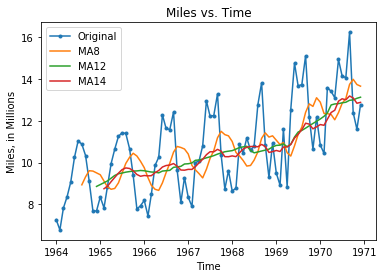

In [8]:
plt.plot(data['Month'],data['Miles, in Millions'], '.-', label='Original')
plt.xlabel('Time')
plt.ylabel('Miles, in Millions')
plt.title('Miles vs. Time')
plt.plot(data['Month'][7:], ma_8, label='MA8')
plt.plot(data['Month'][11:], ma_12, label='MA12')
plt.plot(data['Month'][13:], ma_14, label='MA14')
plt.legend()
plt.show()

A suitable choice for the moving average window length would be a span of 12. This is because it will eliminate the seasonality factor, as each value for the moving average line will capture each of the values for one "season," and the line will be smoother.

## Part 4 -- Based on Q3, describe the trend line. What does it indicate, i.e. is it increasing/decreasing? (5 pts)

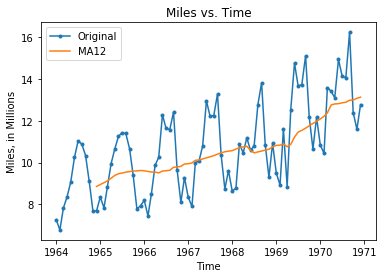

In [9]:
plt.plot(data['Month'],data['Miles, in Millions'], '.-', label='Original')
plt.xlabel('Time')
plt.ylabel('Miles, in Millions')
plt.title('Miles vs. Time')
plt.plot(data['Month'][11:], ma_12, label='MA12')
plt.legend()
plt.show()

The trend line has is increasing, with a slope of approximately 2/3, indicating that each year the miles traveled increases by approximately .667 million. 

## Part 5 -- Compute the first difference of the data and plot the ACF and PACF for the differenced data. What are the significant lags based on the ACF and PACF? (5 pts)

In [10]:
first_diff = []
for i in range(1,len(data['Miles, in Millions'])):
    first_diff+=[data['Miles, in Millions'][i]-data['Miles, in Millions'][i-1]]
first_diff = np.array(first_diff)

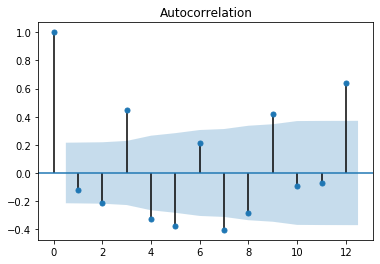

In [12]:
plot_acf(first_diff, lags=12)
plt.show()

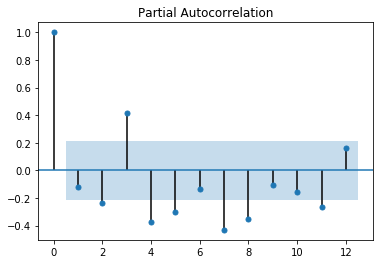

In [19]:
plot_pacf(first_diff, lags=12,method='ywmle')
plt.show()

There is no "cutoff" in either the ACF or PACF within the first S=12 terms and other than the first lag, several of the values are significant. This could be indicative of a model with both AR and MA terms.

## Part 6 -- Using the output from Q5 above, perform a first seasonal difference with the seasonal period you identified in Q2, and plot the ACF and PACF again. What are the significant lags based on the ACF and PACF? (5 pts)

In [13]:
first_diff_seas = []
for i in range(0,len(first_diff)):
    if i<12:
        first_diff_seas += [first_diff[i]]
    else:
        first_diff_seas += [first_diff[i] - first_diff[i-12]]
        
first_diff_seas = np.array(first_diff_seas)

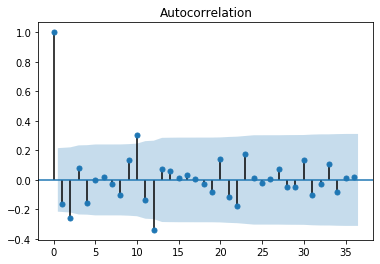

In [14]:
plot_acf(first_diff_seas, lags=36)
plt.show()

Only the first seasonal lag (@12) is significant --> use q=1

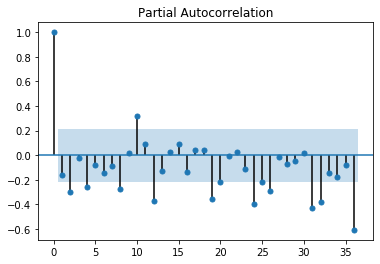

In [15]:
plot_pacf(first_diff_seas, lags=36)
plt.show()

lags 12, 24, 36 are significant -> typical of an MA model

## Part 7 -- Develop a suitable SARIMA model that can be applied on the time series. Use the first 6 years of data only to develop the model. (Hint: The results from Q4-Q6 above should provide you good insight into the range of suitable parameters to consider) (20 pts)

In [16]:
d2 = data[:72].set_index('Month')

In [33]:
model_SARIMA = sm.tsa.statespace.SARIMAX(endog=d2,order=(0,1,2),seasonal_order=(0,1,1,12)).fit()
model_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                 Miles, in Millions   No. Observations:                   72
Model:             SARIMAX(0, 1, 2)x(0, 1, 1, 12)   Log Likelihood                 -70.612
Date:                            Mon, 28 Oct 2019   AIC                            149.225
Time:                                    20:11:28   BIC                            157.535
Sample:                                01-01-1964   HQIC                           152.469
                                     - 12-01-1969                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4247      0.117     -3.619      0.000      -0.655      -0.195
ma.L2         -0.4858      0.165     -2.946      0.003      -0.809      -0.163
ma.S.L12      -0.2919      0.193     -1.516      0.129      -0.669       0.085
sigma2         0.6090      0.085      7.162      0.000       0.442       0.776
===================================================================================
Ljung-Box (Q):                       30.98   Jarque-Bera (JB):                34.31
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.32   Skew:                            -0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
sarima_tests = ['(0,1,2)(0,1,1,12)','(0,1,2)(1,1,1,12)','(0,1,1)(0,1,1,12)','(0,1,1)(1,1,1,12)',
                '(1,1,2)(0,1,1,12)','(1,1,2)(1,1,1,12)','(1,1,1)(0,1,1,12)','(1,1,1)(1,1,1,12)']
AIC_vals = [149.225,151.044,152.719,153.998,149.996,152.377,151.698,153.044]

evaluation = pd.DataFrame({'Model':sarima_tests, 'AIC':AIC_vals})

In [19]:
evaluation

,Model,AIC
0,"(0,1,2)(0,1,1,12)",149.225
1,"(0,1,2)(1,1,1,12)",151.044
2,"(0,1,1)(0,1,1,12)",152.719
3,"(0,1,1)(1,1,1,12)",153.998
4,"(1,1,2)(0,1,1,12)",149.996
5,"(1,1,2)(1,1,1,12)",152.377
6,"(1,1,1)(0,1,1,12)",151.698
7,"(1,1,1)(1,1,1,12)",153.044


Because the SARIMA(0,1,2)(0,1,1,12) model had the lowest AIC (149.225) based on the first six years, I chose that model.

## Part 8 -- Use the model parameters determined in Q7 above to forecast for the 7th year. Compare the forecast with actual values. Provide your own insight on how you believe the forecast can be improved? (10 pts)

In [20]:
test = data[72:]
preds = []
for i in test['Month']:
    preds += [model_SARIMA.predict(i)[0]]

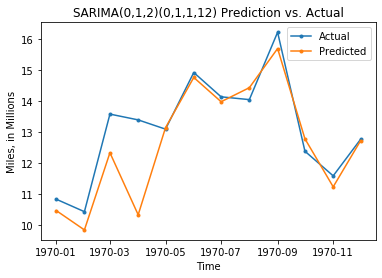

In [22]:
plt.plot(test.Month, test['Miles, in Millions'], '.-',label='Actual')
plt.plot(test.Month, preds, '.-', label='Predicted')
plt.legend()
plt.title('SARIMA(0,1,2)(0,1,1,12) Prediction vs. Actual')
plt.ylabel('Miles, in Millions')
plt.xlabel('Time')
plt.show()

Based on the image above, the only months that are poorly predicted are March and April, April having the largest error. The graph in part 1 displays a general pattern throughout all 7 months of peaks between May and August, followed by dips between November and February. The pattern starts out smooth, and then becomes more and more rigid. Perhaps the model was following this pattern and predicted that there would be more rigidity in the 7th month, and thus overfit the data. Choosing a lower AR model could improve this, for example SARIMA(0,1,1)(0,1,1,12) 